In [1]:
import numpy as np
from numpy import linalg
import cv2
import matplotlib.pyplot as plt

## Functions

In [2]:
# Identity Matrix
def I(n):
    return np.matrix(np.identity(n, dtype=np.int))

In [3]:
# Haar Matrix
H2 = np.asarray([[1, 1], [1, -1]])
m1 = np.matrix([1, 1])
m2 = np.matrix([1, -1])

def H(n):
    if n == 2:
        return np.matrix([[1, 1], [1, -1]])
    n0 = n // 2
    h1 = np.kron(H(n0), m1)
    h2 = np.kron(I(n0), m2)
    return np.concatenate([h1, h2])

h64 = H(64)
h64_inv = linalg.inv(h64)

In [4]:
# Read gray-scale bmp
def read_bmp_gray(file):
    img = cv2.imread(file)
    img = img[:,:,0]
    return img

In [5]:
def show_image(img):
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.show()

In [6]:
def block_encode(b):
    encoded = np.matmul(h64, np.matrix(b.flatten()).T)
    return encoded

In [7]:
def block_decode(v):
    return np.matmul(h64_inv, v).reshape((8,8))

## Experiments

In [8]:
h8 = H(8)
h8

matrix([[ 1,  1,  1,  1,  1,  1,  1,  1],
        [ 1,  1,  1,  1, -1, -1, -1, -1],
        [ 1,  1, -1, -1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  1, -1, -1],
        [ 1, -1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  1, -1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1, -1,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1, -1]])

In [9]:
h64 = H(64)
h64_inv = linalg.inv(h64)
h64.shape
h64_inv.shape

(64, 64)

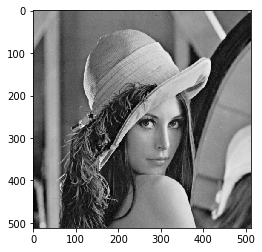

In [10]:
img = read_bmp_gray('lena512.bmp')
show_image(img)

In [11]:
linalg.inv(h64)

matrix([[ 0.015625,  0.015625,  0.03125 , ...,  0.      ,  0.      ,  0.      ],
        [ 0.015625,  0.015625,  0.03125 , ..., -0.      , -0.      , -0.      ],
        [ 0.015625,  0.015625,  0.03125 , ..., -0.      , -0.      , -0.      ],
        ..., 
        [ 0.015625, -0.015625, -0.      , ..., -0.      , -0.5     , -0.      ],
        [ 0.015625, -0.015625, -0.      , ..., -0.      , -0.      ,  0.5     ],
        [ 0.015625, -0.015625, -0.      , ..., -0.      , -0.      , -0.5     ]])

In [12]:
block = img[0:8,0:8]

In [13]:
encoded = np.matmul(h64, np.matrix(block.flatten()).T)
encoded.shape

(64, 1)

In [14]:
block

array([[162, 162, 162, 161, 162, 157, 163, 161],
       [162, 162, 162, 161, 162, 157, 163, 161],
       [162, 162, 162, 161, 162, 157, 163, 161],
       [162, 162, 162, 161, 162, 157, 163, 161],
       [162, 162, 162, 161, 162, 157, 163, 161],
       [164, 164, 158, 155, 161, 159, 159, 160],
       [160, 160, 163, 158, 160, 162, 159, 156],
       [159, 159, 155, 157, 158, 159, 156, 157]], dtype=uint8)

In [15]:
np.matmul(h64_inv, encoded).reshape((8,8))

matrix([[ 162.,  162.,  162.,  161.,  162.,  157.,  163.,  161.],
        [ 162.,  162.,  162.,  161.,  162.,  157.,  163.,  161.],
        [ 162.,  162.,  162.,  161.,  162.,  157.,  163.,  161.],
        [ 162.,  162.,  162.,  161.,  162.,  157.,  163.,  161.],
        [ 162.,  162.,  162.,  161.,  162.,  157.,  163.,  161.],
        [ 164.,  164.,  158.,  155.,  161.,  159.,  159.,  160.],
        [ 160.,  160.,  163.,  158.,  160.,  162.,  159.,  156.],
        [ 159.,  159.,  155.,  157.,  158.,  159.,  156.,  157.]])

non_zero    : 262144
non_zero_hat: 33229, total: 262144, percent: 0.126759


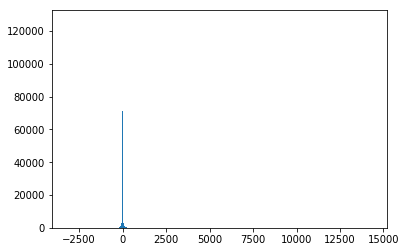

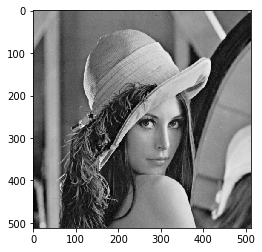

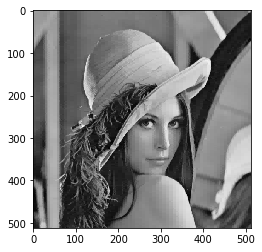

In [20]:
img = read_bmp_gray('lena512.bmp')
h, w = img.shape
img_hat = np.zeros(img.shape)
img_encoded = np.zeros(img.shape)
non_zeros_hat = 0
for i in range(0, h, 8):
    for j in range(0, w, 8):
        block = img[i:(i+8), j:(j+8)]
        v = block_encode(block)
        img_encoded[i:(i+8), j:(j+8)] = v.reshape(8,8)
        v[abs(v) < 40] = 0
        non_zeros_hat += np.count_nonzero(v)
        block_hat = block_decode(v)
        img_hat[i:(i+8), j:(j+8)] = block_hat
print('non_zero    : %d' % np.count_nonzero(img))
print('non_zero_hat: %d, total: %d, percent: %f' % (non_zeros_hat, h*w, non_zeros_hat / (h*w)))
# plt.hist(img_encoded.flatten())
# print(np.histogram(img_encoded, bins=50))
plt.hist(img_encoded.flatten(), bins=1000)
plt.show()
show_image(img)
show_image(img_hat)

In [17]:
img

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ..., 
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)